# Customer Segmentation and Honda Vehicle Sales Analysis Project

"""
Author: Amritanshu Raj



Date : 27-06-2025



This project analyzes vehicle sales data to perform customer segmentation 
and extract key business insights for strategic decision-making.
"""

In [7]:
# IMPORTING LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset & Cleaning

df = pd.read_csv('//Users//amritanshuraj//Desktop//Data.csv')

In [9]:
df

,Sn.o,Date,Customer Name,Vachile Name,Cost,Payment Method,Purchase Date,Staff Name,Location,Vachile Model
0,1,2024-10-14,Suresh Verma,Honda Activa,123185,Cash,2024-10-18,Neha,Boring Road,2022
1,2,2024-01-16,Rohit Kumar,Honda Activa,71813,Cash,2024-02-05,Ajay,Boring Road,2023
2,3,2024-07-19,Anjali Thakur,Honda Shine,105645,Card,2024-07-21,Ajay,Kankarbagh,2023
3,4,2025-04-26,Kiran Verma,Honda Hornet,82497,UPI,2025-04-27,Deepa,Bailey Road,2024
4,5,2024-03-20,Ravi Singh,Honda Activa,149704,Card,2024-03-26,Vikash,Bailey Road,2022
...,...,...,...,...,...,...,...,...,...,...
995,996,2024-01-14,Suresh Gupta,Honda Hornet,61985,Card,2024-01-29,Ajay,Patliputra,2024
996,997,2024-09-19,Pooja Yadav,Honda Shine,140506,UPI,2024-10-06,Vikash,Boring Road,2024
997,998,2024-05-22,Rohit Gupta,Honda Shine,76607,Cash,2024-06-11,Sunita,Bailey Road,2024
998,999,2024-05-06,Anjali Choudhary,Honda Shine,105826,Cash,2024-05-10,Sunita,Kankarbagh,2023


In [10]:
# checking for null values.
df.isnull().sum()

Sn.o              0
Date              0
Customer Name     0
Vachile Name      0
Cost              0
Payment Method    0
Purchase Date     0
Staff Name        0
Location          0
Vachile Model     0
dtype: int64

In [13]:
# Rename columns to correct spelling and format.
df.rename(columns={ "Sn.o":"S_No.",
                    "Vachile Name":"Vehicle_Name",
                    "Vachile Model":"Vehicle_Model"},inplace=True)

In [14]:
df[:5]

,S_No.,Date,Customer Name,Vehicle_Name,Cost,Payment Method,Purchase Date,Staff Name,Location,Vehicle_Model
0,1,2024-10-14,Suresh Verma,Honda Activa,123185,Cash,2024-10-18,Neha,Boring Road,2022
1,2,2024-01-16,Rohit Kumar,Honda Activa,71813,Cash,2024-02-05,Ajay,Boring Road,2023
2,3,2024-07-19,Anjali Thakur,Honda Shine,105645,Card,2024-07-21,Ajay,Kankarbagh,2023
3,4,2025-04-26,Kiran Verma,Honda Hornet,82497,UPI,2025-04-27,Deepa,Bailey Road,2024
4,5,2024-03-20,Ravi Singh,Honda Activa,149704,Card,2024-03-26,Vikash,Bailey Road,2022


In [17]:
# Converting object date data-type into date and time (proper format)
df["Date"] = pd.to_datetime(df["Date"], errors = "coerce")
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"], errors = "coerce")

In [18]:
# cross-checking for date data-type is datetime.
df.dtypes[["Date","Purchase Date"]]

Date             datetime64[ns]
Purchase Date    datetime64[ns]
dtype: object

In [21]:
# Validate Cost data
df = df[df["Cost"]>0]
df

,S_No.,Date,Customer Name,Vehicle_Name,Cost,Payment Method,Purchase Date,Staff Name,Location,Vehicle_Model
0,1,2024-10-14,Suresh Verma,Honda Activa,123185,Cash,2024-10-18,Neha,Boring Road,2022
1,2,2024-01-16,Rohit Kumar,Honda Activa,71813,Cash,2024-02-05,Ajay,Boring Road,2023
2,3,2024-07-19,Anjali Thakur,Honda Shine,105645,Card,2024-07-21,Ajay,Kankarbagh,2023
3,4,2025-04-26,Kiran Verma,Honda Hornet,82497,UPI,2025-04-27,Deepa,Bailey Road,2024
4,5,2024-03-20,Ravi Singh,Honda Activa,149704,Card,2024-03-26,Vikash,Bailey Road,2022
...,...,...,...,...,...,...,...,...,...,...
995,996,2024-01-14,Suresh Gupta,Honda Hornet,61985,Card,2024-01-29,Ajay,Patliputra,2024
996,997,2024-09-19,Pooja Yadav,Honda Shine,140506,UPI,2024-10-06,Vikash,Boring Road,2024
997,998,2024-05-22,Rohit Gupta,Honda Shine,76607,Cash,2024-06-11,Sunita,Bailey Road,2024
998,999,2024-05-06,Anjali Choudhary,Honda Shine,105826,Cash,2024-05-10,Sunita,Kankarbagh,2023


In [22]:
print("✅ Data cleaning completed. Final records:", len(df))

✅ Data cleaning completed. Final records: 1000


# Analysis

In [23]:
# Location based analysis with count of unique customers.
df.groupby("Location")["Customer Name"].nunique().reset_index(name= "Customer Count")

,Location,Customer Count
0,Ashiana,76
1,Bailey Road,79
2,Boring Road,80
3,Fraser Road,76
4,Kankarbagh,89
5,Patliputra,81


In [25]:
# total unique customers
df["Customer Name"].nunique()

100

In [27]:
# total sales
df["Cost"].sum()

np.int64(105031079)

In [28]:
# average vehicel cost
df["Cost"].mean()

np.float64(105031.079)

In [35]:
# most preferred vehicle model
df["Vehicle_Model"].mode()[0]

np.int64(2023)

In [39]:
# top performing staff
top_staff = df.groupby('Staff Name')['Vehicle_Name'].count().sort_values(ascending=False).head(1)
top_staff

Staff Name
Neha    188
Name: Vehicle_Name, dtype: int64

In [43]:
# most preferred vehicle per location
most_preferred = df.groupby(["Location","Vehicle_Name"]).size().reset_index(name="Count")
most_preferred = most_preferred.loc[most_preferred.groupby("Location")["Count"].idxmax()]
most_preferred

,Location,Vehicle_Name,Count
2,Ashiana,Honda Hornet,46
8,Bailey Road,Honda Shine,41
10,Boring Road,Honda Activa,39
19,Fraser Road,Honda Unicorn,39
22,Kankarbagh,Honda Hornet,41
29,Patliputra,Honda Unicorn,41


In [45]:
# average cost by staff
staff_avg_cost = df.groupby("Staff Name")["Cost"].mean().reset_index()
staff_avg_cost

,Staff Name,Cost
0,Ajay,105794.573964
1,Deepa,105013.063380
2,Neha,103577.590426
3,Rajeev,104559.420732
4,Sunita,104257.705202
5,Vikash,107213.573171


In [47]:
#top 5 customers
top_customers = df.groupby("Customer Name")["Cost"].sum().nlargest(5).reset_index()
top_customers

,Customer Name,Cost
0,Rohit Singh,2084245
1,Suman Choudhary,1946917
2,Pooja Kumar,1864919
3,Ravi Kumar,1801954
4,Suresh Sharma,1750672


In [50]:
# vehicle with highest avg. cost
vehicle_avg_cost = df.groupby("Vehicle_Name")["Cost"].mean().sort_values(ascending=False).head(1)
vehicle_avg_cost

Vehicle_Name
Honda Dio    108030.936893
Name: Cost, dtype: float64

In [56]:
# sales by payment method 
payment_method_sales = df["Payment Method"].value_counts().reset_index()
payment_method_sales

,Payment Method,count
0,Cash,254
1,EMI,254
2,Card,252
3,UPI,240


# NumPy Calculations

In [67]:
# Cost Statistics
costs = df["Cost"].values
mean_cost = np.mean(costs)
median_cost = np.median(costs)
std_cost = np.std(costs)

print("="*50)
print("Cost Statistics Summary:")
print(f"Mean Cost: {mean_cost:.2f}")
print(f"Median Cost: {median_cost:.2f}")
print(f"Standard Deviation of Cost: {std_cost:.2f}")
print("="*50)

Cost Statistics Summary:
Mean Cost: 105031.08
Median Cost: 105472.50
Standard Deviation of Cost: 26008.96


In [72]:
# depriciation calculation
#5% yearly depreciation eg[assume 100% is total depriciation then, 
                                     #100%-5%=95%(first year factor= 0.95) 
                                     # 5% for 0.95 then, 0.95*0.95=0.9025 (second year)
                                     # 5% for 0.9025 then,0.9025*0.95=0.857375 ]

depreciation = np.array([0.95, 0.9025, 0.857375]) 
depreciated_costs = np.outer(costs, depreciation)
depreciated_costs 

array([[117025.75    , 111174.4625  , 105615.739375],
       [ 68222.35    ,  64811.2325  ,  61570.670875],
       [100362.75    ,  95344.6125  ,  90577.381875],
       ...,
       [ 72776.65    ,  69137.8175  ,  65680.926625],
       [100534.7     ,  95507.965   ,  90732.56675 ],
       [ 57805.6     ,  54915.32    ,  52169.554   ]], shape=(1000, 3))

In [75]:
# cumulative cost
cumulative_cost =np.cumsum(costs)
cumulative_cost

array([   123185,    194998,    300643,    383140,    532844,    629165,
          752178,    832121,    938347,   1083877,   1164530,   1232617,
         1347359,   1445906,   1535634,   1648385,   1726641,   1826246,
         1913488,   2039160,   2106883,   2186022,   2259303,   2398726,
         2499780,   2588294,   2702045,   2776050,   2924672,   3071199,
         3188911,   3289630,   3362634,   3433196,   3529416,   3669593,
         3809865,   3886818,   3969634,   4112475,   4172877,   4257669,
         4395103,   4498298,   4572838,   4692710,   4805945,   4895555,
         4983916,   5129237,   5278254,   5406422,   5496381,   5569643,
         5652803,   5740603,   5859480,   5953171,   6032641,   6155082,
         6232652,   6318285,   6431445,   6498638,   6600816,   6711358,
         6859282,   6970912,   7064433,   7190911,   7320145,   7440875,
         7543479,   7621454,   7702199,   7837401,   7982036,   8097449,
         8228683,   8318509,   8386806,   8511001, 

In [78]:
# apply discount
discounted_cost = np.where(costs>120000,costs*0.9,costs)
discounted_cost

array([110866.5,  71813. , 105645. ,  82497. , 134733.6,  96321. ,
       110711.7,  79943. , 106226. , 130977. ,  80653. ,  68087. ,
       114742. ,  98547. ,  89728. , 112751. ,  78256. ,  99605. ,
        87242. , 113104.8,  67723. ,  79139. ,  73281. , 125480.7,
       101054. ,  88514. , 113751. ,  74005. , 133759.8, 131874.3,
       117712. , 100719. ,  73004. ,  70562. ,  96220. , 126159.3,
       126244.8,  76953. ,  82816. , 128556.9,  60402. ,  84792. ,
       123690.6, 103195. ,  74540. , 119872. , 113235. ,  89610. ,
        88361. , 130788.9, 134115.3, 115351.2,  89959. ,  73262. ,
        83160. ,  87800. , 118877. ,  93691. ,  79470. , 110196.9,
        77570. ,  85633. , 113160. ,  67193. , 102178. , 110542. ,
       133131.6, 111630. ,  93521. , 113830.2, 116310.6, 108657. ,
       102604. ,  77975. ,  80745. , 121681.8, 130171.5, 115413. ,
       118110.6,  89826. ,  68297. , 111775.5,  68501. , 101165. ,
       117394. , 111838. , 130402.8, 106198. ,  62650. , 10070

# Data Visualisation

Text(0.5, 1.0, 'Vehicle Sales by Location')

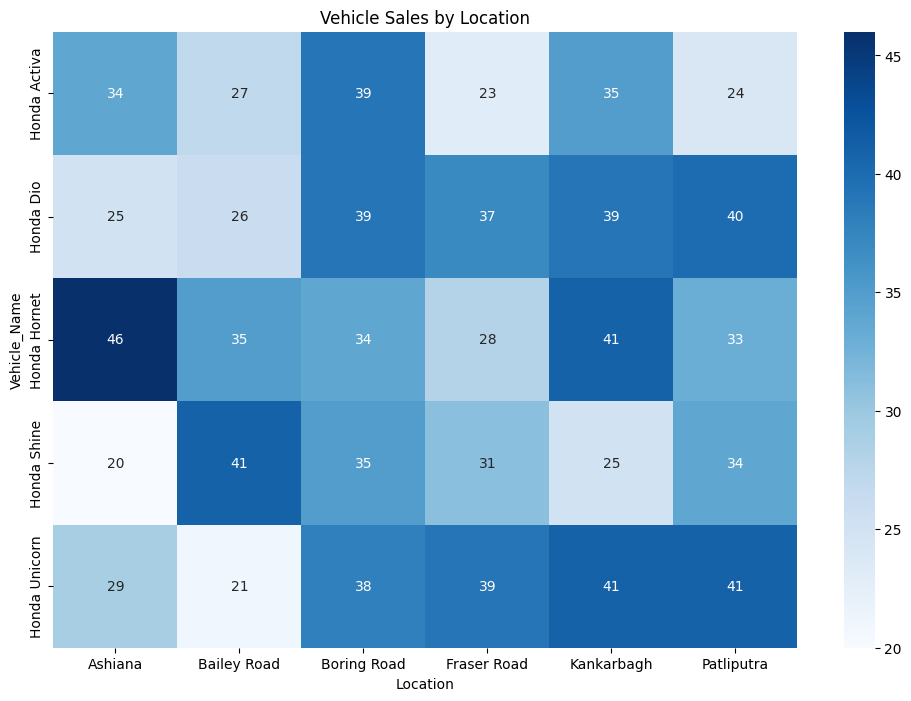

In [79]:
# Heatmap best for inventory planning
plt.figure(figsize=(12,8))
vehicle_location = pd.crosstab(df["Vehicle_Name"],df["Location"])
sns.heatmap(vehicle_location,annot=True, fmt="d", cmap="Blues")
plt.title("Vehicle Sales by Location")

Text(0.5, 1.0, 'Cost of Distribution by Payment Method')

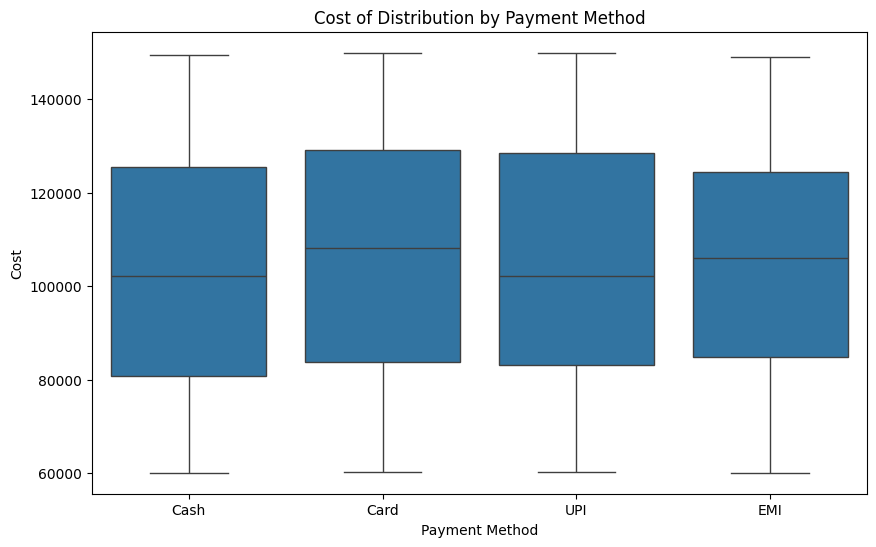

In [80]:
# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="Payment Method", y="Cost", data=df)
plt.title("Cost of Distribution by Payment Method")

Text(0.5, 1.0, 'Vehicles Sold per Location')

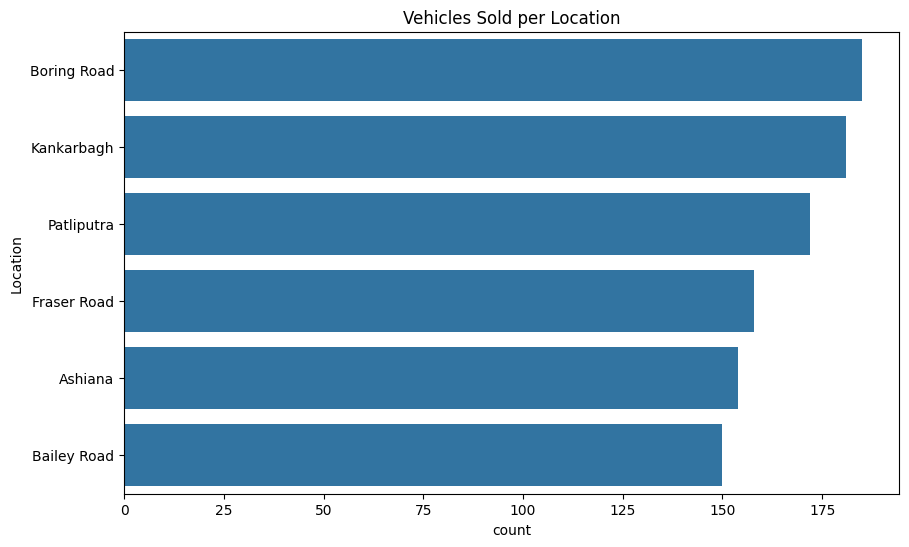

In [81]:
# countplot
plt.figure(figsize=(10,6))
sns.countplot(y="Location",data=df, order=df["Location"].value_counts().index)
plt.title("Vehicles Sold per Location")

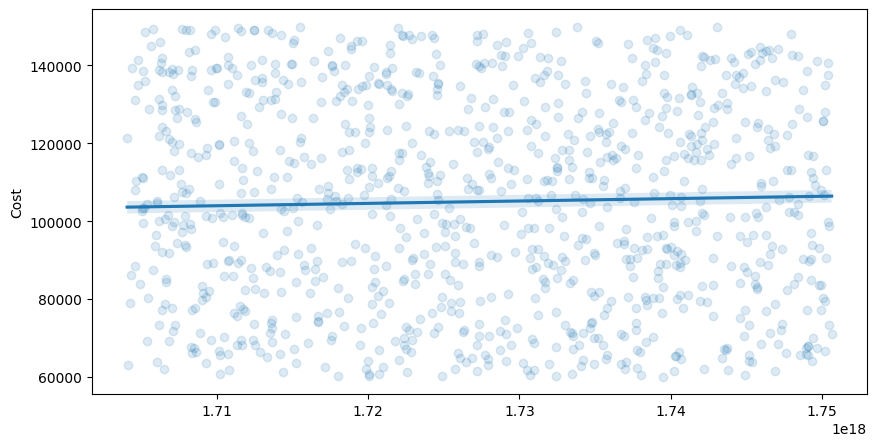

In [86]:
# scatterplot
plt.figure(figsize=(12,6))
plt.scatter(df["Purchase Date"],df["Cost"],alpha=0.6)
plt.title("Vehicle Cost Over Time")
plt.ylabel("Cost")

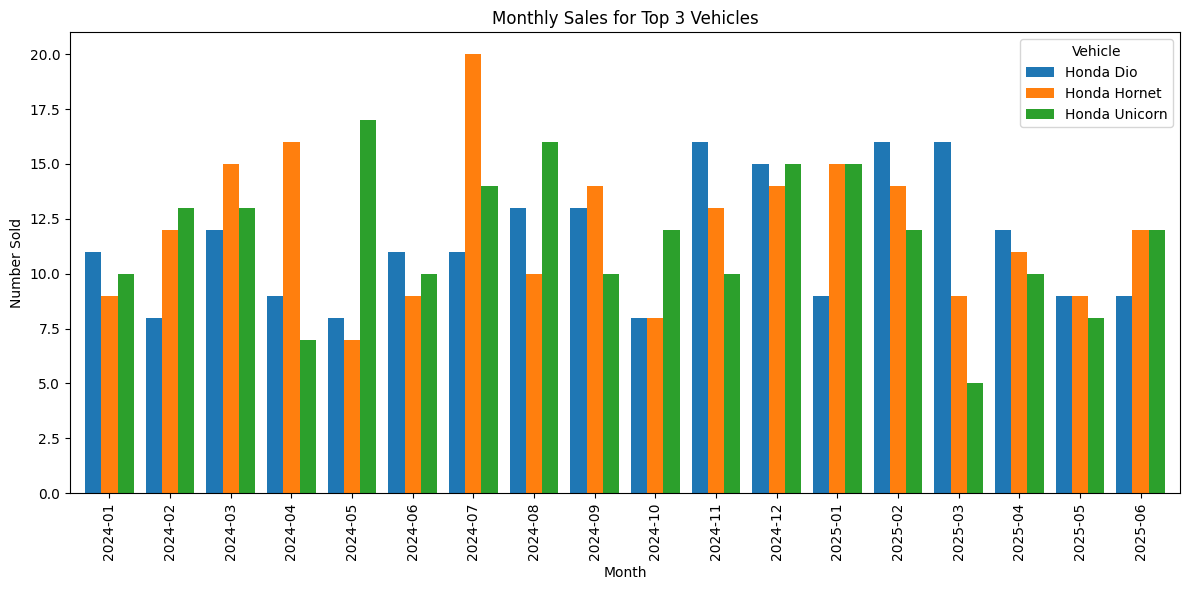

In [89]:
# Q20: Top 3 vehicle trends
# 1. Get top 3 vehicles
top_vehicles = df['Vehicle_Name'].value_counts().head(3).index.tolist()

# 2. Filter data
top_data = df[df['Vehicle_Name'].isin(top_vehicles)].copy()

# 3. Create month column
top_data['Month'] = top_data['Purchase Date'].dt.strftime('%Y-%m')

# 4. Count sales per month per vehicle
monthly_sales = top_data.groupby(['Month', 'Vehicle_Name']).size().unstack()

# 5. Create plot
monthly_sales.plot(kind='bar', 
                   figsize=(12,6),
                   width=0.8)

# 6. Add labels
plt.title('Monthly Sales for Top 3 Vehicles')
plt.xlabel('Month')
plt.ylabel('Number Sold')
plt.legend(title='Vehicle')
plt.tight_layout()
plt.savefig('simple_sales_trend.png')
plt.show()